## LACC Python Capstone Project 3 - Stock Returns Microsofot - IBM

#### In this project, we are going to compare the stock returns over time of two technology companies: Microsoft & IBM.

#### I am going to compare which stock has perform better over time. To calculate returns, I am using the logarithm return method which gives a more precise result than the regular mathematical return.

### Data Dictionary Information

1. **Date:** Date of the stock price records.

2. **Open:** The average value of opened price on a particular day.

3. **Close:**  The average value of closed  price on a particular day.

4. **Low:** The lowest price reached on a particular day.

5. **High:** The highest price reached on a particular day.

#### Let's export  all necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install quandl
import quandl as q
pd.set_option('display.float_format', '{:.6f}'.format) #Setting the number of decimal places

#### As data source, we are importing historical stock prices from WIKI Prices using quandl library.

#### First, let's import the historical stock prices for both companies. The tickers for Microsoft and IBM are MSFT and IBM respectively.

In [36]:
data1 = q.get('WIKI/' 'MSFT') # Getting Microsoft dataset
data1.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1986-03-13,25.500000,29.250000,25.500000,28.000000,3582600.000000,0.000000,1.000000,0.058941,0.067609,0.058941,0.064720,1031788800.000000
1986-03-14,28.000000,29.500000,28.000000,29.000000,1070000.000000,0.000000,1.000000,0.064720,0.068187,0.064720,0.067031,308160000.000000
1986-03-17,29.000000,29.750000,29.000000,29.500000,462400.000000,0.000000,1.000000,0.067031,0.068765,0.067031,0.068187,133171200.000000
1986-03-18,29.500000,29.750000,28.500000,28.750000,235300.000000,0.000000,1.000000,0.068187,0.068765,0.065876,0.066454,67766400.000000
1986-03-19,28.750000,29.000000,28.000000,28.250000,166300.000000,0.000000,1.000000,0.066454,0.067031,0.064720,0.065298,47894400.000000


In [37]:
data2 = q.get('WIKI/' 'IBM') # Getting Microsoft dataset
data2.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1962-01-02,578.500000,578.500000,572.000000,572.000000,19360.000000,0.000000,1.000000,15.270839,15.270839,15.099257,15.099257,387200.000000
1962-01-03,572.000000,577.000000,572.000000,577.000000,14400.000000,0.000000,1.000000,15.099257,15.231243,15.099257,15.231243,288000.000000
1962-01-04,577.000000,577.000000,571.000000,571.250000,12800.000000,0.000000,1.000000,15.231243,15.231243,15.072860,15.079459,256000.000000
1962-01-05,570.500000,570.500000,559.000000,560.000000,18160.000000,0.000000,1.000000,15.059661,15.059661,14.756092,14.782489,363200.000000
1962-01-08,559.500000,559.500000,545.000000,549.500000,27200.000000,0.000000,1.000000,14.769291,14.769291,14.386530,14.505318,544000.000000


- The date column is showing as the index of the dataset. Later, we will reset the index of the dataset.

- The two columns that we are concentrating for our analysis: The Open and the Close columns.

- Let's first reset the index of the data set and save each dataset as a CSV.

- The start date for IBM stock prices on January 2, 1962 in comparison to Microsoft March 13, 1986. I am going to recreate the IBM where it shows stock prices from March 13, 1986 forward.

In [38]:
# Recreating IBM dataset showing stock prices starting March 13, 1986.
df = data2.loc['1986-03-13':, :]
df.head()


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1986-03-13,148.380000,150.880000,147.750000,150.500000,2084900.000000,0.000000,1.000000,19.584159,19.914125,19.501007,19.863970,8339600.000000
1986-03-14,150.750000,151.500000,148.000000,150.380000,2512400.000000,0.000000,1.000000,19.896967,19.995957,19.534004,19.848132,10049600.000000
1986-03-17,149.750000,151.000000,149.500000,150.880000,1927700.000000,0.000000,1.000000,19.764980,19.929963,19.731984,19.914125,7710800.000000
1986-03-18,150.880000,153.500000,150.750000,152.380000,1816700.000000,0.000000,1.000000,19.914125,20.259930,19.896967,20.112105,7266800.000000
1986-03-19,152.380000,152.380000,150.250000,151.630000,1304600.000000,0.000000,1.000000,20.112105,20.112105,19.830973,20.013115,5218400.000000


- Now, IBM is only showing stock prices starting on March 13, 1986.
- Let's reset the index for each dataset.

In [39]:
data1.reset_index(inplace=True)
data1.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1986-03-13,25.500000,29.250000,25.500000,28.000000,3582600.000000,0.000000,1.000000,0.058941,0.067609,0.058941,0.064720,1031788800.000000
1,1986-03-14,28.000000,29.500000,28.000000,29.000000,1070000.000000,0.000000,1.000000,0.064720,0.068187,0.064720,0.067031,308160000.000000
2,1986-03-17,29.000000,29.750000,29.000000,29.500000,462400.000000,0.000000,1.000000,0.067031,0.068765,0.067031,0.068187,133171200.000000
3,1986-03-18,29.500000,29.750000,28.500000,28.750000,235300.000000,0.000000,1.000000,0.068187,0.068765,0.065876,0.066454,67766400.000000
4,1986-03-19,28.750000,29.000000,28.000000,28.250000,166300.000000,0.000000,1.000000,0.066454,0.067031,0.064720,0.065298,47894400.000000


In [40]:
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1986-03-13,148.380000,150.880000,147.750000,150.500000,2084900.000000,0.000000,1.000000,19.584159,19.914125,19.501007,19.863970,8339600.000000
1,1986-03-14,150.750000,151.500000,148.000000,150.380000,2512400.000000,0.000000,1.000000,19.896967,19.995957,19.534004,19.848132,10049600.000000
2,1986-03-17,149.750000,151.000000,149.500000,150.880000,1927700.000000,0.000000,1.000000,19.764980,19.929963,19.731984,19.914125,7710800.000000
3,1986-03-18,150.880000,153.500000,150.750000,152.380000,1816700.000000,0.000000,1.000000,19.914125,20.259930,19.896967,20.112105,7266800.000000
4,1986-03-19,152.380000,152.380000,150.250000,151.630000,1304600.000000,0.000000,1.000000,20.112105,20.112105,19.830973,20.013115,5218400.000000


#### Let's know read the CSV for each data set.

In [41]:
data1.to_csv('MSFT.csv', index=False) #converting into a CSV file

In [42]:
df.to_csv('IBM.csv', index=False) #converting into a CSV file

#### Let's know read the CSV for each data set.

In [43]:
msft = pd.read_csv('MSFT.csv')
msft.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1986-03-13,25.500000,29.250000,25.500000,28.000000,3582600.000000,0.000000,1.000000,0.058941,0.067609,0.058941,0.064720,1031788800.000000
1,1986-03-14,28.000000,29.500000,28.000000,29.000000,1070000.000000,0.000000,1.000000,0.064720,0.068187,0.064720,0.067031,308160000.000000
2,1986-03-17,29.000000,29.750000,29.000000,29.500000,462400.000000,0.000000,1.000000,0.067031,0.068765,0.067031,0.068187,133171200.000000
3,1986-03-18,29.500000,29.750000,28.500000,28.750000,235300.000000,0.000000,1.000000,0.068187,0.068765,0.065876,0.066454,67766400.000000
4,1986-03-19,28.750000,29.000000,28.000000,28.250000,166300.000000,0.000000,1.000000,0.066454,0.067031,0.064720,0.065298,47894400.000000


In [44]:
ibm = pd.read_csv('IBM.csv')
ibm.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1986-03-13,148.380000,150.880000,147.750000,150.500000,2084900.000000,0.000000,1.000000,19.584159,19.914125,19.501007,19.863970,8339600.000000
1,1986-03-14,150.750000,151.500000,148.000000,150.380000,2512400.000000,0.000000,1.000000,19.896967,19.995957,19.534004,19.848132,10049600.000000
2,1986-03-17,149.750000,151.000000,149.500000,150.880000,1927700.000000,0.000000,1.000000,19.764980,19.929963,19.731984,19.914125,7710800.000000
3,1986-03-18,150.880000,153.500000,150.750000,152.380000,1816700.000000,0.000000,1.000000,19.914125,20.259930,19.896967,20.112105,7266800.000000
4,1986-03-19,152.380000,152.380000,150.250000,151.630000,1304600.000000,0.000000,1.000000,20.112105,20.112105,19.830973,20.013115,5218400.000000


### Checking the features of each dataset

In [45]:
print(f'Microsoft Rows: {msft.shape[0]} \nMicrosoft Columns:{msft.shape[1]}')

Microsoft Rows: 8076 
Microsoft Columns:13


In [46]:
print(f'IBM Rows: {ibm.shape[0]} \nMicrosoft Columns:{ibm.shape[1]}')

IBM Rows: 8076 
Microsoft Columns:13


In [47]:
#Checking the data types for the IBM dataset.
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8076 entries, 0 to 8075
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         8076 non-null   object 
 1   Open         8076 non-null   float64
 2   High         8076 non-null   float64
 3   Low          8076 non-null   float64
 4   Close        8076 non-null   float64
 5   Volume       8076 non-null   float64
 6   Ex-Dividend  8076 non-null   float64
 7   Split Ratio  8076 non-null   float64
 8   Adj. Open    8076 non-null   float64
 9   Adj. High    8076 non-null   float64
 10  Adj. Low     8076 non-null   float64
 11  Adj. Close   8076 non-null   float64
 12  Adj. Volume  8076 non-null   float64
dtypes: float64(12), object(1)
memory usage: 820.3+ KB


- The Microsoft dataset has 12 float and 1 object data types.
- It seems that there are not missing values.

In [48]:
#Let's do a statistical summary of the Microsoft dataset.
msft.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,8076.000000,59.832154,32.526935,15.200000,28.940000,54.250000,83.750000,178.940000
High,8076.000000,60.666713,33.033695,15.620000,29.250000,55.005000,84.955000,180.380000
Low,8076.000000,59.025261,32.017552,14.870000,28.660000,53.500000,82.702500,175.750000
Close,8076.000000,59.874821,32.562926,15.150000,28.940000,54.250000,83.870000,179.940000
Volume,8076.000000,31258675.585810,32041253.877836,8000.000000,2370594.500000,26179200.000000,49910175.000000,591052200.000000
Ex-Dividend,8076.000000,0.001735,0.038948,0.000000,0.000000,0.000000,0.000000,3.080000
Split Ratio,8076.000000,1.000991,0.030460,1.000000,1.000000,1.000000,1.000000,2.000000
Adj. Open,8076.000000,18.763583,17.756714,0.058941,1.908662,18.581468,24.045268,97.000000
Adj. High,8076.000000,18.964604,17.901221,0.061253,1.934665,18.856998,24.273922,97.240000
Adj. Low,8076.000000,18.564394,17.607812,0.058941,1.882658,18.366597,23.802299,96.040000


- Microsoft the average open price is approximately 59.83 with a minimum of 15.20 and a max of 178.94
- The average close price is approximately 59.88 with a minimum of 15.15 and the highest price of 179.94.
- Let’s check the data types for the IBM dataset.

In [49]:
#Checking the data types for the IBM dataset
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8076 entries, 0 to 8075
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         8076 non-null   object 
 1   Open         8076 non-null   float64
 2   High         8076 non-null   float64
 3   Low          8076 non-null   float64
 4   Close        8076 non-null   float64
 5   Volume       8076 non-null   float64
 6   Ex-Dividend  8076 non-null   float64
 7   Split Ratio  8076 non-null   float64
 8   Adj. Open    8076 non-null   float64
 9   Adj. High    8076 non-null   float64
 10  Adj. Low     8076 non-null   float64
 11  Adj. Close   8076 non-null   float64
 12  Adj. Volume  8076 non-null   float64
dtypes: float64(12), object(1)
memory usage: 820.3+ KB


- The IBM dataset has 12 floats and one object data type.
- It looks like there are no missing values in the dataset.
- Let's check the statistical summary of the dataset.


In [50]:
ibm.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,8076.000000,119.793670,38.268124,41.000000,92.500000,113.250000,147.750000,241.500000
High,8076.000000,120.960653,38.466310,41.750000,93.462500,114.500000,148.970000,246.000000
Low,8076.000000,118.684067,38.098826,40.630000,91.672500,112.120000,146.645000,237.000000
Close,8076.000000,119.825630,38.303660,41.000000,92.547500,113.370000,147.760000,246.000000
Volume,8076.000000,4757736.209014,3421057.396784,163200.000000,2285543.750000,4024175.000000,6209375.000000,69444700.000000
Ex-Dividend,8076.000000,0.009386,0.093975,0.000000,0.000000,0.000000,0.000000,1.500000
Split Ratio,8076.000000,1.000248,0.015736,1.000000,1.000000,1.000000,1.000000,2.000000
Adj. Open,8076.000000,71.420311,53.251323,7.056547,17.343934,64.948947,104.416584,186.042617
Adj. High,8076.000000,72.086138,53.608637,7.185630,17.473538,65.695630,105.207042,186.491787
Adj. Low,8076.000000,70.799308,52.926384,6.992866,17.178284,64.269430,103.917571,185.109726


- The average open price is 119.79.  The lowest and highest prices are 41 and 241.50 respectively.
- The average close price is 119.87  and the lowest and highest prices are 41 and 246.00 respectively.

- Overall, IBM stocks have higher stock prices than Microsoft. However, this doesn’t mean that it has higher returns, which is the purpose of this analysis.  

### Cleaning Data

#### The data has not that much cleaning to do. However, let's change the column names to lower case. In addition, some of the columns name are showing with spaces in between. Let's rename some of these columns.

In [51]:
# Changing Microsoft column names to lower case
msft.columns = [x.lower() for x in msft.columns]
msft.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ex-dividend',
       'split ratio', 'adj. open', 'adj. high', 'adj. low', 'adj. close',
       'adj. volume'],
      dtype='object')

- The columns for Microsoft are shown in lowercase.
- Let’s do the same for the IBM dataset.

In [52]:
ibm.columns = [x.lower() for x in ibm.columns]
ibm.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ex-dividend',
       'split ratio', 'adj. open', 'adj. high', 'adj. low', 'adj. close',
       'adj. volume'],
      dtype='object')

In [53]:
msft.rename(columns={

                'split ratio': 'split_ratio',
                'adj. open' : 'adj_open',
                'adj. high': 'adj_high',
                'adj. low' : 'adj_low',
                'adj. close': 'adj_close',
                'adj. volume': 'adj_volume'
            }, inplace=True)


In [54]:
msft.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ex-dividend',
       'split_ratio', 'adj_open', 'adj_high', 'adj_low', 'adj_close',
       'adj_volume'],
      dtype='object')

In [55]:
ibm.rename(columns={

                'split ratio': 'split_ratio',
                'adj. open' : 'adj_open',
                'adj. high': 'adj_high',
                'adj. low' : 'adj_low',
                'adj. close': 'adj_close',
                'adj. volume': 'adj_volume'
            }, inplace=True)
ibm.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ex-dividend',
       'split_ratio', 'adj_open', 'adj_high', 'adj_low', 'adj_close',
       'adj_volume'],
      dtype='object')

- Now, Let's calculate the daily stock return for both datasets. As previously mentioned, we are using the log return method. The log return method gives a more precise result.
- The np.log method in Numpy is the method used to accomplish it.
- Let's start with the Microsoft dataset.

In [56]:
#Creating log return column for Microsoft data set
msft['log_return'] = np.log(msft['close'] / msft['open']).shift(1)
msft.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ex-dividend',
       'split_ratio', 'adj_open', 'adj_high', 'adj_low', 'adj_close',
       'adj_volume', 'log_return'],
      dtype='object')

In [57]:
msft.log_return

0            NaN
1       0.093526
2       0.035091
3       0.017094
4      -0.025752
          ...   
8071    0.000859
8072   -0.004854
8073   -0.016294
8074   -0.026264
8075    0.034387
Name: log_return, Length: 8076, dtype: float64

In [58]:
#Creating log return column for IBM data set
ibm['log_return'] = np.log(ibm['close'] / ibm['open']).shift(1)
ibm.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ex-dividend',
       'split_ratio', 'adj_open', 'adj_high', 'adj_low', 'adj_close',
       'adj_volume', 'log_return'],
      dtype='object')

In [59]:
ibm.log_return

0            NaN
1       0.014187
2      -0.002457
3       0.007518
4       0.009893
          ...   
8071   -0.008415
8072    0.000766
8073   -0.018953
8074   -0.022316
8075    0.014184
Name: log_return, Length: 8076, dtype: float64

#### We could check the highest return for each stock.

In [60]:
print(f'Microsoft stock highest return: {round(msft.log_return.max(),6)}')
print(f'IBM stock highest return: {round(ibm.log_return.max(),6)}')

Microsoft stock highest return: 0.146328
IBM stock highest return: 0.122033


### EDA

##### Let's check the distribution for the open, close, and return columns.

#### Microsoft

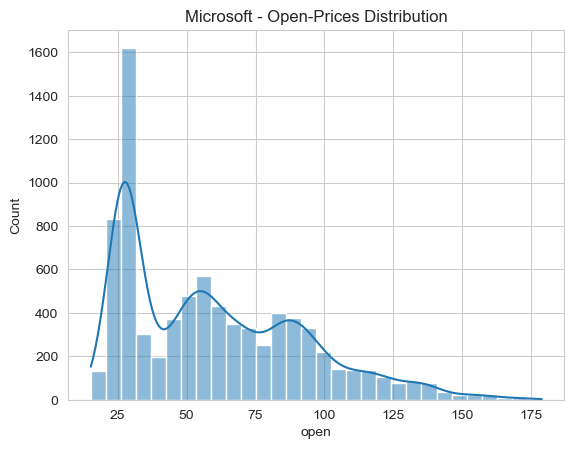

In [61]:
# Checking the distribution Open Price column

sns.histplot(data=msft, x='open', kde=True)
plt.title('Microsoft - Open-Prices Distribution')
sns.set_style('whitegrid')
plt.show()

 - The open-price distribution skews to the right.
 - Most of the open-price for Microsoft is between 25 and 30 dollars.

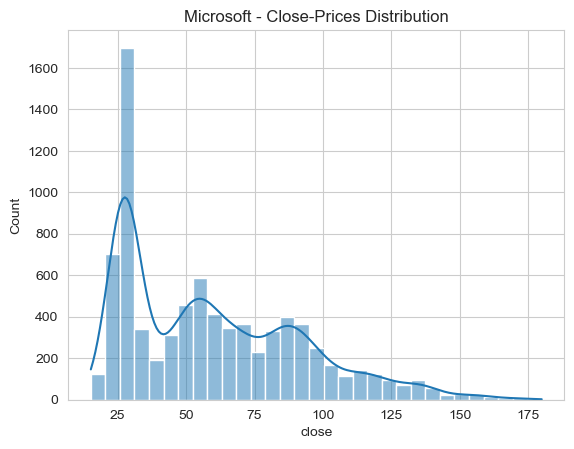

In [28]:
# Checking the distribution for the Microsoft Close Price column

sns.histplot(data=msft, x='close', kde=True)
plt.title('Microsoft - Close-Prices Distribution')
sns.set_style('whitegrid')
plt.show()

 - The open-price distribution skews to the right.
 - Most of the open-price for Microsoft is between 25 and 30 dollars.
 - It is the same behavior as the open-prices.

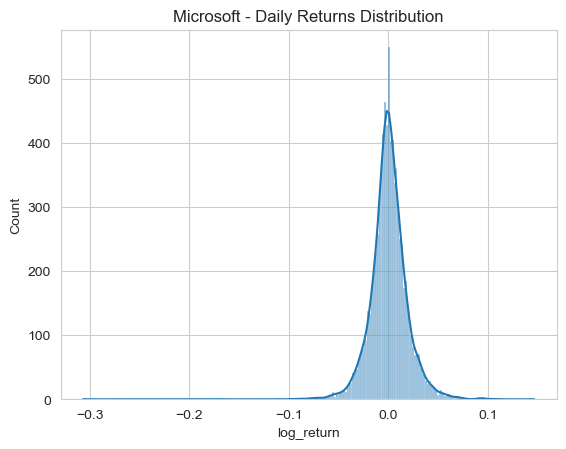

In [29]:
#checking the distribution of the daily return columns
sns.histplot(data=msft, x='log_return', kde=True)
sns.set_style('whitegrid')
plt.title('Microsoft - Daily Returns Distribution')
plt.show()

- The log return has a normal distribution where most returns are closed to zero.

### IBM

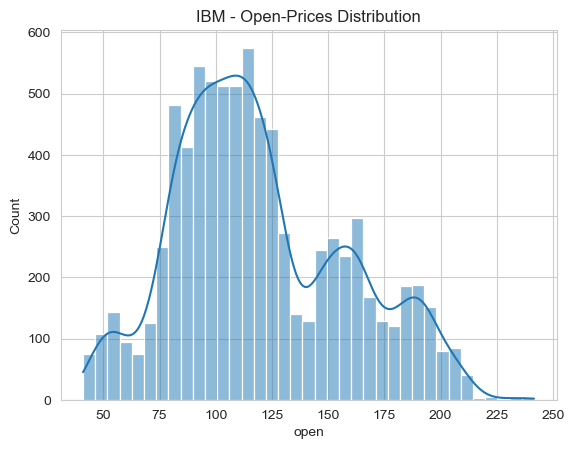

In [30]:
#Checking the distribution of the open-price columns
sns.histplot(data=ibm, x='open', kde=True)
sns.set_style('whitegrid')
plt.title('IBM - Open-Prices Distribution')
plt.show()

 - IBM open-price has a diverse distribution mostly concentrated between 75 and 125.

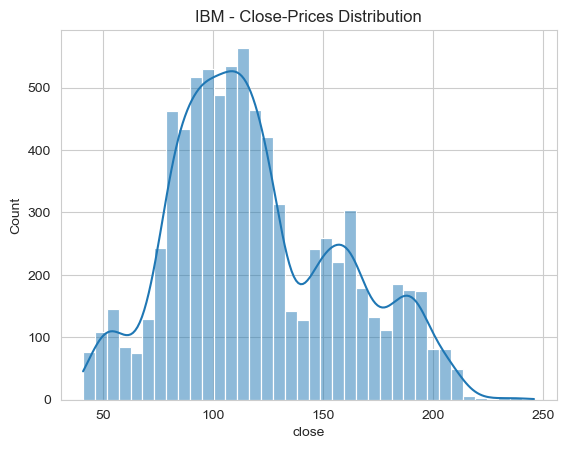

In [31]:
# checking the distribution of the close-price columns
sns.histplot(data=ibm, x='close', kde=True)
sns.set_style('whitegrid')
plt.title('IBM - Close-Prices Distribution')
plt.show()

- Most of the close-price is concentrated between 85 and 135.

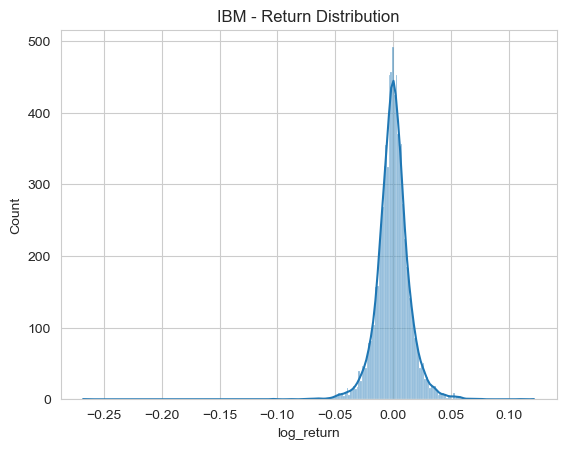

In [32]:
# Checking the return column distribution
sns.histplot(data=ibm, x='log_return', kde=True)
sns.set_style('whitegrid')
plt.title('IBM - Return Distribution')
plt.show()

- The log return has a normal distribution where most returns are closed to zero.

#### For the rest of my analysis, I am combining both datasets. Before combining them, I am assigning a new column for each dataset to identify each row by its ticker name.

In [62]:
msft = msft.assign(ticker='MSFT')
ibm = ibm.assign(ticker='IBM')

In [63]:
msft_ibm = pd.concat([msft, ibm], ignore_index=True)
msft_ibm.head()

,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,log_return,ticker
0,1986-03-13,25.500000,29.250000,25.500000,28.000000,3582600.000000,0.000000,1.000000,0.058941,0.067609,0.058941,0.064720,1031788800.000000,NaN,MSFT
1,1986-03-14,28.000000,29.500000,28.000000,29.000000,1070000.000000,0.000000,1.000000,0.064720,0.068187,0.064720,0.067031,308160000.000000,0.093526,MSFT
2,1986-03-17,29.000000,29.750000,29.000000,29.500000,462400.000000,0.000000,1.000000,0.067031,0.068765,0.067031,0.068187,133171200.000000,0.035091,MSFT
3,1986-03-18,29.500000,29.750000,28.500000,28.750000,235300.000000,0.000000,1.000000,0.068187,0.068765,0.065876,0.066454,67766400.000000,0.017094,MSFT
4,1986-03-19,28.750000,29.000000,28.000000,28.250000,166300.000000,0.000000,1.000000,0.066454,0.067031,0.064720,0.065298,47894400.000000,-0.025752,MSFT


#### Let's check which stock has the highest open-price.

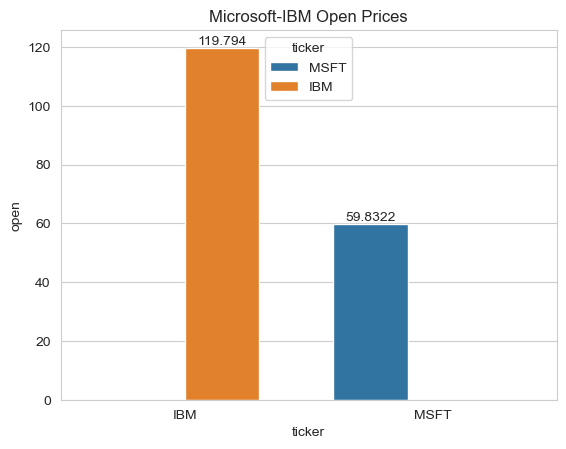

In [65]:
tickers = ['IBM', 'MSFT']
ax = sns.barplot(data=msft_ibm, y='open', x= 'ticker', hue='ticker', ci=None, order=tickers)
sns.set_style('whitegrid')
for bar in ax.patches:
    bar.set_width(0.3)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Microsoft-IBM Open Prices')
plt.show()

- As expected, IBM average open-price is higher than Microsoft at 119.
79 and 59.83 repectively.
- Now, let's check the average close-price.

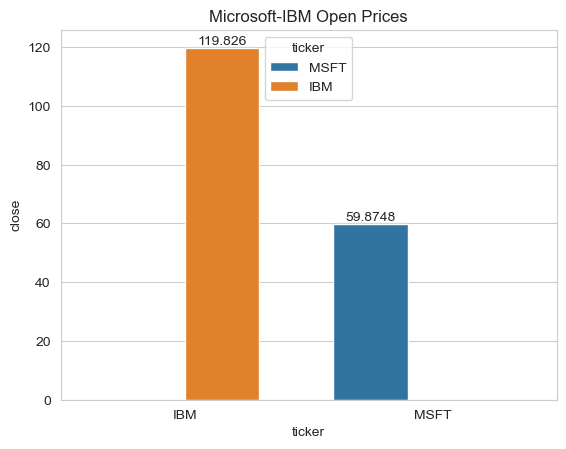

In [66]:
ax = sns.barplot(data=msft_ibm, y='close', x= 'ticker', hue='ticker', ci=None, order=tickers)
sns.set_style('whitegrid')
for bar in ax.patches:
    bar.set_width(0.3)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Microsoft-IBM Open Prices')
plt.show()

- Both stocks are showing a little bit higher stock prices in comparison to the open price.
- In the case of Microsoft, the average closing price is 59.87 and the opening price 59.83. For IBM, the close price 119.83 and 119.79 respectively.

- We can go ahead and check the average returns.


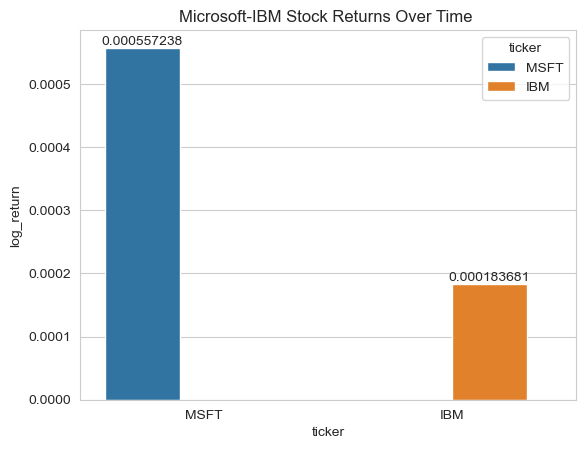

In [68]:
tickers2 = ['MSFT', 'IBM']
ax = sns.barplot(data=msft_ibm, y='log_return', x= 'ticker', hue='ticker', ci=None, order=tickers2)
sns.set_style('whitegrid')
for bar in ax.patches:
    bar.set_width(0.3)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Microsoft-IBM Stock Returns Over Time ')
plt.show()

- Over time, Microsoft shows higher returns at 0.000557238 percentage points than to IBM at 0.000183681.

- These percentage points might look insignificant to the regular eye. However, for an investor owning thousands or millions of shares, negative or positive changes could impact her portfolio inversely or adversely respectively.

- Now, let's check the median return for each stock measurement with boxplots.


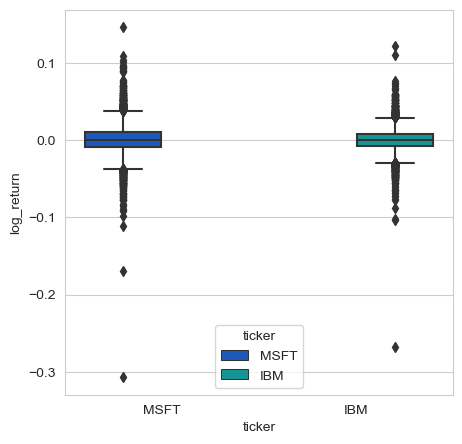

In [69]:
plt.figure(figsize=[5,5])
ax = sns.boxplot(data=msft_ibm, x='ticker', hue='ticker', y='log_return', palette='winter')
plt.show()

- The median return for both stocks is around zero


#### Let's check the correlation of among the columns using seaborn heatmap.

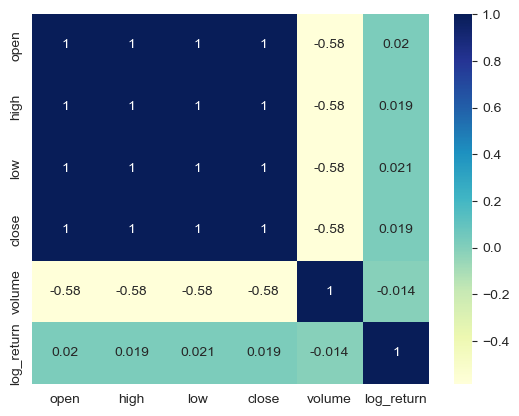

In [70]:
sns.heatmap(data=msft_ibm[['open','high', 'low', 'close', 'volume','log_return']].corr(), annot=True, cmap='YlGnBu')
plt.show()

- It can be observed that most of the variables are highly correlated. Volume has a medium correlation with the rest of the variables except the returns.
- Log return has a low correlation with the rest of the variables.

- Let's check the returns per year for both stocks.
- However, we need to convert the date column as a datetime data type.

In [71]:
msft_ibm['date'] = pd.to_datetime(msft_ibm['date'])
msft_ibm.head()

,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,log_return,ticker
0,1986-03-13,25.500000,29.250000,25.500000,28.000000,3582600.000000,0.000000,1.000000,0.058941,0.067609,0.058941,0.064720,1031788800.000000,NaN,MSFT
1,1986-03-14,28.000000,29.500000,28.000000,29.000000,1070000.000000,0.000000,1.000000,0.064720,0.068187,0.064720,0.067031,308160000.000000,0.093526,MSFT
2,1986-03-17,29.000000,29.750000,29.000000,29.500000,462400.000000,0.000000,1.000000,0.067031,0.068765,0.067031,0.068187,133171200.000000,0.035091,MSFT
3,1986-03-18,29.500000,29.750000,28.500000,28.750000,235300.000000,0.000000,1.000000,0.068187,0.068765,0.065876,0.066454,67766400.000000,0.017094,MSFT
4,1986-03-19,28.750000,29.000000,28.000000,28.250000,166300.000000,0.000000,1.000000,0.066454,0.067031,0.064720,0.065298,47894400.000000,-0.025752,MSFT


In [72]:
msft_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16152 entries, 0 to 16151
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         16152 non-null  datetime64[ns]
 1   open         16152 non-null  float64       
 2   high         16152 non-null  float64       
 3   low          16152 non-null  float64       
 4   close        16152 non-null  float64       
 5   volume       16152 non-null  float64       
 6   ex-dividend  16152 non-null  float64       
 7   split_ratio  16152 non-null  float64       
 8   adj_open     16152 non-null  float64       
 9   adj_high     16152 non-null  float64       
 10  adj_low      16152 non-null  float64       
 11  adj_close    16152 non-null  float64       
 12  adj_volume   16152 non-null  float64       
 13  log_return   16150 non-null  float64       
 14  ticker       16152 non-null  object        
dtypes: datetime64[ns](1), float64(13), object(1)
memory u

- Now, the datet column is converted to a datetime data type.

#### Let's create a year column to see the dates as a year.

In [73]:
msft_ibm['year'] = msft_ibm['date'].dt.year
msft_ibm.head()

,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,log_return,ticker,year
0,1986-03-13,25.500000,29.250000,25.500000,28.000000,3582600.000000,0.000000,1.000000,0.058941,0.067609,0.058941,0.064720,1031788800.000000,NaN,MSFT,1986
1,1986-03-14,28.000000,29.500000,28.000000,29.000000,1070000.000000,0.000000,1.000000,0.064720,0.068187,0.064720,0.067031,308160000.000000,0.093526,MSFT,1986
2,1986-03-17,29.000000,29.750000,29.000000,29.500000,462400.000000,0.000000,1.000000,0.067031,0.068765,0.067031,0.068187,133171200.000000,0.035091,MSFT,1986
3,1986-03-18,29.500000,29.750000,28.500000,28.750000,235300.000000,0.000000,1.000000,0.068187,0.068765,0.065876,0.066454,67766400.000000,0.017094,MSFT,1986
4,1986-03-19,28.750000,29.000000,28.000000,28.250000,166300.000000,0.000000,1.000000,0.066454,0.067031,0.064720,0.065298,47894400.000000,-0.025752,MSFT,1986


- Let's create lineplot showing stock prices yearly.

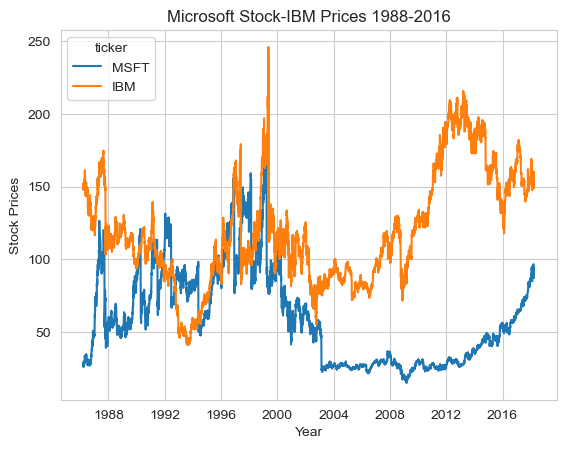

In [74]:
sns.lineplot(data=msft_ibm, x='date', y='close', hue='ticker')
plt.title('Microsoft Stock-IBM Prices 1988-2016')
plt.xlabel('Year')
plt.ylabel('Stock Prices')
plt.show()

- By 1988, both stocks went Down. One factor contributing to this was the market crash of October 1987. Investors' confidence went down after the crash. Another factor influencing this deep in tech stock prices was the rise in interest rates by the Federal Reserve.

- From 1996 to 2000, the two major contributors to the rise of both stocks were emerge of the dot com industry and low interest rates.

- Between 2001 and 2004, both stocks went down due to the September 11, 2001 terrorist attack and the dot com market crash.

- Starting in 2004, Microsoft shares went flat but IBM shares had some steady growth. However, both went down by 2009 due to the Mortgage Financial crisis of 2008.

#### Now, let's check the behavior of the returns through the years.

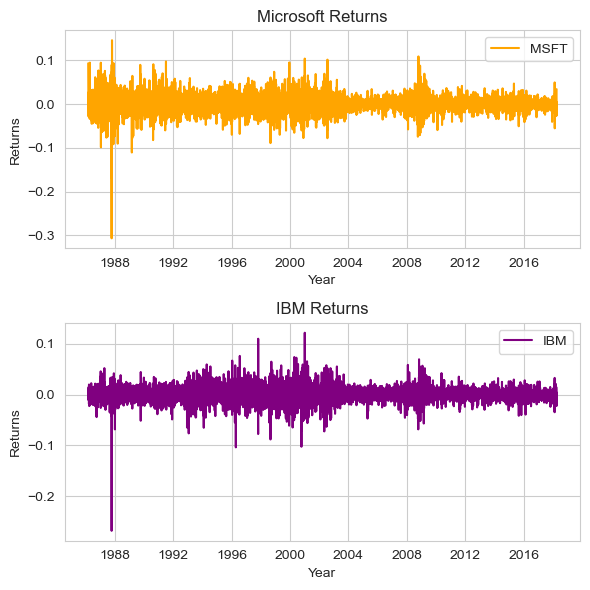

In [75]:
fig, axs = plt.subplots(nrows=2, figsize = (6,6))
#plt.xticks(rotation=90)
sns.lineplot(ax = axs[0], x="date", y = "log_return", data=msft_ibm[msft_ibm['ticker'] == 'MSFT'], label='MSFT', color='orange')
sns.lineplot(ax = axs[1], x="date", y = "log_return", data=msft_ibm[msft_ibm['ticker'] == 'IBM'], label='IBM', color='purple')
axs[0].set_title('Microsoft Returns')
axs[1].set_title('IBM Returns')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Returns')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Returns')
plt.tight_layout()
plt.show()

- As expected, both stocks' returns were negative as both stocks' prices registered a big decline due to the 1987 stock crash. However, Microsoft's returns went even lower by 0.04 points. By around 1990, Microsoft's returns were much higher at 0.10 than IBM's with less than 0.05.

- During the dot com era, IBM stocks outperformed Microsoft. In 1996 and 2001, IBM stocks had returns of over 0.10 percentage points.

- During the 2008 mortgage crisis both stocks underperformed resulting in negative returns.


### Now, let's create a pivot table to summarize some of the measures such as the mean and median for the open-price and return columns.

In [76]:
msft_ibm.pivot_table(index='ticker', values=['open', 'log_return'], aggfunc=['mean', 'median', 'max', 'min'])

mean                median                   max             \
       log_return       open log_return       open log_return       open   
ticker                                                                     
IBM      0.000184 119.793670   0.000000 113.250000   0.122033 241.500000   
MSFT     0.000557  59.832154   0.000000  54.250000   0.146328 178.940000   

              min            
       log_return      open  
ticker                       
IBM     -0.268122 41.000000  
MSFT    -0.306835 15.200000

### Let's create three more pivot tables grouped by year to summarize the same measurements in three different periods: 1987-1996, 1997-2006, and 2007-2016.

### Period 1987-1996

In [77]:
filtered_msft_ibm_1987_1996 = msft_ibm.query('year >= 1987 and year <= 1996') # Using the query() method to filter the years.
filtered_msft_ibm_1987_1996.pivot_table(index=['year', 'ticker'], values=['open', 'log_return'], aggfunc=['mean', 'median', 'max', 'min']) # Craeting pivot table.

mean                median                   max             \
            log_return       open log_return       open log_return       open   
year ticker                                                                     
1987 IBM     -0.000610 145.088814   0.000000 150.500000   0.052299 175.000000   
     MSFT     0.003016  82.808735   0.002448  89.500000   0.146328 126.500000   
1988 IBM     -0.000238 116.535968  -0.000997 115.500000   0.038510 129.130000   
     MSFT    -0.000540  55.530751   0.000000  55.250000   0.044452  69.750000   
1989 IBM     -0.000680 111.683333   0.000000 112.250000   0.044672 129.750000   
     MSFT     0.001340  62.607500   0.002136  58.440000   0.090026  89.000000   
1990 IBM      0.000624 108.666245   0.000000 107.750000   0.035013 122.500000   
     MSFT     0.001893  76.402846   0.001177  73.000000   0.091388 121.750000   
1991 IBM     -0.000926 105.672885  -0.001078 102.370000   0.027339 138.250000   
     MSFT     0.003235  93.366917   0.001208  96.250000   0.097926 114.000000   
1992 IBM     -0.001736  83.985669  -0.001868  88.370000   0.034401  99.000000   
     MSFT    -0.000481  98.195709   0.000000  92.000000   0.058371 131.250000   
1993 IBM     -0.001699  49.235296  -0.002427  49.250000   0.047628  59.250000   
     MSFT    -0.000214  83.494466  -0.001426  83.500000   0.059820  95.750000   
1994 IBM      0.000507  62.840714   0.000000  62.065000   0.059640  75.620000   
     MSFT     0.001021  67.740397   0.000000  62.500000   0.041923  98.000000   
1995 IBM      0.000083  91.899960   0.000000  93.870000   0.046161 113.870000   
     MSFT     0.000232  83.039127   0.000000  87.310000   0.053215 107.750000   
1996 IBM      0.001689 116.933307   0.001198 113.310000   0.076382 163.630000   
     MSFT     0.001522 115.337756   0.000957 117.870000   0.046831 158.380000   

                   min             
            log_return       open  
year ticker                        
1987 IBM     -0.268122 105.750000  
     MSFT    -0.306835  40.000000  
1988 IBM     -0.068383 104.620000  
     MSFT    -0.090225  46.000000  
1989 IBM     -0.051308  93.620000  
     MSFT    -0.110488  46.380000  
1990 IBM     -0.038444  94.750000  
     MSFT    -0.082120  52.250000  
1991 IBM     -0.048723  85.370000  
     MSFT    -0.059890  60.750000  
1992 IBM     -0.064672  50.000000  
     MSFT    -0.052605  68.000000  
1993 IBM     -0.076205  41.000000  
     MSFT    -0.039609  71.250000  
1994 IBM     -0.065139  52.130000  
     MSFT    -0.047346  48.250000  
1995 IBM     -0.042368  72.000000  
     MSFT    -0.058496  58.750000  
1996 IBM     -0.103696  84.120000  
     MSFT    -0.069948  76.620000

### Period 1997-2006

In [78]:
filtered_msft_ibm_1997_2006 = msft_ibm.query('year >= 1997 and year <= 2006') # Using the query() method to filter the years.
filtered_msft_ibm_1997_2006.pivot_table(index=['year', 'ticker'], values=['open', 'log_return'], aggfunc=['mean', 'median', 'max', 'min']) # Creating pivot table.

mean                median                   max             \
            log_return       open log_return       open log_return       open   
year ticker                                                                     
1997 IBM     -0.000299 120.460949  -0.000817 105.620000   0.110214 175.130000   
     MSFT     0.000636 120.898696  -0.001873 129.380000   0.060419 150.500000   
1998 IBM      0.001518 124.237817   0.000666 119.625000   0.065022 188.630000   
     MSFT     0.002892 107.951905   0.003786 105.780000   0.074108 159.380000   
1999 IBM     -0.002055 145.287817  -0.002880 128.000000   0.057719 241.500000   
     MSFT    -0.000693 105.874365  -0.000669  92.310000   0.095532 178.940000   
2000 IBM     -0.000612 110.688056  -0.001062 111.905000   0.074197 133.060000   
     MSFT    -0.003084  76.428373  -0.003097  70.690000   0.063925 117.370000   
2001 IBM      0.001745 107.335847   0.001496 107.800000   0.122033 123.890000   
     MSFT     0.002665  62.394839   0.000151  63.145000   0.104341  73.700000   
2002 IBM     -0.001106  84.289643  -0.001713  80.400000   0.058041 125.000000   
     MSFT    -0.000534  54.579921  -0.000481  53.845000   0.101929  69.750000   
2003 IBM      0.000916  85.035754  -0.000061  84.770000   0.055605  93.900000   
     MSFT    -0.001337  29.276746  -0.001653  26.280000   0.055911  57.000000   
2004 IBM      0.000549  90.724246   0.000874  90.240000   0.022229 100.060000   
     MSFT    -0.000206  27.129893   0.000000  27.220000   0.026294  30.160000   
2005 IBM     -0.000312  83.812817  -0.000581  82.840000   0.029242  98.970000   
     MSFT    -0.000074  25.872587  -0.001153  25.740000   0.034532  28.200000   
2006 IBM      0.001325  82.994422   0.001746  81.760000   0.020954  97.110000   
     MSFT     0.000893  26.264040   0.001000  26.880000   0.029113  30.190000   

                   min            
            log_return      open  
year ticker                       
1997 IBM     -0.077475 83.500000  
     MSFT    -0.047157 82.000000  
1998 IBM     -0.088165 96.750000  
     MSFT    -0.088998 79.250000  
1999 IBM     -0.060993 90.500000  
     MSFT    -0.069964 76.750000  
2000 IBM     -0.102496 83.500000  
     MSFT    -0.077439 40.750000  
2001 IBM     -0.055915 83.750000  
     MSFT    -0.053682 43.190000  
2002 IBM     -0.072321 54.650000  
     MSFT    -0.077805 41.750000  
2003 IBM     -0.037598 75.250000  
     MSFT    -0.042802 22.810000  
2004 IBM     -0.020784 82.540000  
     MSFT    -0.024409 24.360000  
2005 IBM     -0.047063 72.530000  
     MSFT    -0.024396 23.990000  
2006 IBM     -0.025211 73.340000  
     MSFT    -0.035195 21.590000

### Period 2007 - 2016

In [79]:
filtered_msft_ibm_2007_2016 = msft_ibm.query('year >= 2007 and year <= 2016') # Using the query() method to filter the years.
filtered_msft_ibm_2007_2016.pivot_table(index=['year', 'ticker'], values=['open', 'log_return'], aggfunc=['mean', 'median', 'max', 'min']) # Creating pivot table.

mean                median                   max             \
            log_return       open log_return       open log_return       open   
year ticker                                                                     
2007 IBM      0.000967 105.706211   0.001686 105.520000   0.027073 119.310000   
     MSFT     0.000525  30.431219   0.000000  29.910000   0.035674  37.220000   
2008 IBM     -0.000072 110.023577   0.001576 116.100000   0.069746 129.830000   
     MSFT    -0.001732  26.692362  -0.003160  27.610000   0.109290  35.790000   
2009 IBM      0.003475 108.904871   0.003215 107.135000   0.057055 132.410000   
     MSFT     0.001715  22.935519   0.001313  23.350000   0.069730  31.350000   
2010 IBM      0.001321 131.676925   0.001714 129.000000   0.042494 146.730000   
     MSFT    -0.000623  27.072371  -0.000162  26.730000   0.036914  31.330000   
2011 IBM      0.001218 170.729563   0.000280 168.540000   0.035558 193.640000   
     MSFT     0.000237  26.045899  -0.000198  25.930000   0.041908  28.895000   
2012 IBM      0.000189 196.530280   0.000453 195.460000   0.022020 211.150000   
     MSFT    -0.000284  29.827550  -0.001553  30.055000   0.031661  32.910000   
2013 IBM      0.000426 194.069227   0.000290 194.035000   0.026378 215.380000   
     MSFT     0.001494  32.443603   0.000925  32.905000   0.036554  38.850000   
2014 IBM      0.000233 182.260675   0.000173 186.255000   0.032728 198.050000   
     MSFT     0.000374  42.437489   0.000417  41.845000   0.036267  49.740000   
2015 IBM     -0.000134 155.374802   0.000031 157.275000   0.029871 174.470000   
     MSFT     0.001181  46.658889   0.000286  46.160000   0.047266  56.470000   
2016 IBM      0.001149 150.342520   0.000894 152.535000   0.028297 168.970000   
     MSFT     0.000559  55.230476   0.000393  54.940000   0.031099  63.840000   

                   min             
            log_return       open  
year ticker                        
2007 IBM     -0.045489  90.250000  
     MSFT    -0.033406  26.820000  
2008 IBM     -0.068289  72.740000  
     MSFT    -0.074336  18.020000  
2009 IBM     -0.056790  83.340000  
     MSFT    -0.052928  15.200000  
2010 IBM     -0.027251 121.470000  
     MSFT    -0.059246  23.090000  
2011 IBM     -0.034111 147.130000  
     MSFT    -0.040397  23.750000  
2012 IBM     -0.028948 179.480000  
     MSFT    -0.028964  26.380000  
2013 IBM     -0.029763 173.220000  
     MSFT    -0.031351  26.490000  
2014 IBM     -0.030861 151.520000  
     MSFT    -0.035036  34.730000  
2015 IBM     -0.041548 131.790000  
     MSFT    -0.050480  40.340000  
2016 IBM     -0.039240 118.460000  
     MSFT    -0.040977  48.680000

## Conclusion

- Over time, Microsoft shows higher returns at 0.000557238 percentage points than IBM at 0.000183681.

- These percentage points might look insignificant to the regular eye. However, for an investor owning thousands or millions of shares, negative or positive changes could impact her portfolio greatly.

- Though IBM's stock outperformed Microsoft's in certain periods (such as 1996 and 2001), Microsoft has performed better than IBMs.

- Microsoft stock is a better portfolio investment than IBM.